In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
width = 5.949973986 # in inches
height = 3.850394
ratio = (np.sqrt(5.0) - 1.0) / 2.0

In [3]:
Adv = pd.read_csv("../../Results/Ising_Frustrated/DWave/Embeddings_Advantage.csv")
Prot = pd.read_csv("../../Results/Ising_Frustrated/DWave/Embeddings_Advantage2_prototype.csv")

In [4]:
Adv_grouped = Adv.groupby("L").agg(["mean", "std"])
Prot_grouped = Prot.groupby("L").agg(["mean", "std"])

In [17]:
def plots(quantity):
    Adv_mean = Adv_grouped[quantity]["mean"].to_numpy()
    Adv_std = Adv_grouped[quantity]["std"].to_numpy()
    x = list(range(5, Adv_grouped.index[-1]+1, 5))

    plt.plot(x, Adv_mean, label="Pegasus")
    plt.fill_between(x, (Adv_mean + Adv_std), (Adv_mean - Adv_std), alpha=0.5)

    Prot_mean = Prot_grouped[quantity]["mean"].to_numpy()
    Prot_std = Prot_grouped[quantity]["std"].to_numpy()
    x = list(range(5, Prot_grouped.index[-1]+1, 5))

    plt.plot(x, Prot_mean, label="Zephyr")
    plt.fill_between(x, (Prot_mean + Prot_std), (Prot_mean - Prot_std), alpha=0.5)

    plt.xlabel("L")
    plt.ylabel("# Qubits")
    plt.grid()
    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    
    

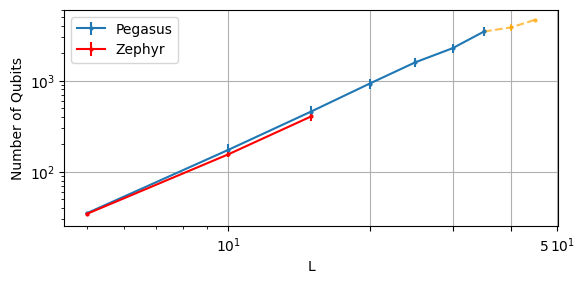

In [49]:
fig = plt.figure(figsize=(width, 0.8* width * ratio))

Adv_mean = Adv_grouped["Qubits"]["mean"].to_numpy()
Adv_std = Adv_grouped["Qubits"]["std"].to_numpy()
x = list(range(5, Adv_grouped.index[-1]+1, 5))

#plt.plot(x[:-1], Adv_mean[:-1], label="Pegasus")
#plt.fill_between(x[:-1], (Adv_mean + Adv_std)[:-1], (Adv_mean - Adv_std)[:-1], alpha=0.5)

plt.errorbar([35, 40, 45], [Adv_mean[-2], Adv_mean[-1], 4681], [0, Adv_std[-1], 0], alpha=0.7, fmt="--o", markersize=2, color="orange")
plt.errorbar(x[:-1], Adv_mean[:-1], Adv_std[:-1], fmt="-o", label="Pegasus", markersize=2)


Prot_mean = Prot_grouped["Qubits"]["mean"].to_numpy()
Prot_std = Prot_grouped["Qubits"]["std"].to_numpy()
x = list(range(5, Prot_grouped.index[-1]+1, 5))

#plt.plot(x, Prot_mean,"-o", label="Zephyr", markersize=4 )
#plt.fill_between(x, (Prot_mean + Prot_std), (Prot_mean - Prot_std), alpha=0.5)

plt.errorbar(x, Prot_mean, Prot_std, label="Zephyr", color="red", fmt="-o", markersize=2)

plt.xlabel("L")
plt.ylabel("Number of Qubits")
plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.xticks([10,20, 30, 40, 50], labels=[r"$10^1$","","","",  r"$5\,10^1$"])
plt.legend()

fig.tight_layout()

plt.savefig("../../Images/Ising_Frustrated/Qubits_scaling_embedding.pdf")

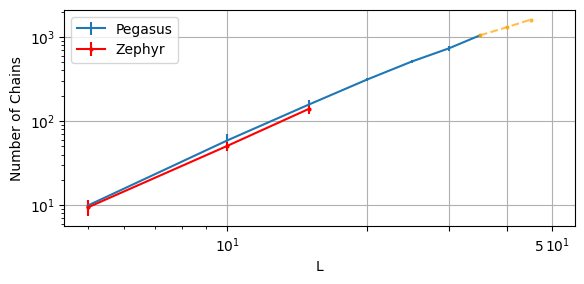

In [50]:
fig = plt.figure(figsize=(width, 0.8* width * ratio))

Adv_mean = Adv_grouped["N Chains"]["mean"].to_numpy()
Adv_std = Adv_grouped["N Chains"]["std"].to_numpy()
x = list(range(5, Adv_grouped.index[-1]+1, 5))

#plt.plot(x[:-1], Adv_mean[:-1], "-o", label="Pegasus", markersize=4)
#plt.fill_between(x[:-1], (Adv_mean + Adv_std)[:-1], (Adv_mean - Adv_std)[:-1], alpha=0.5)

plt.errorbar(x[:-1], Adv_mean[:-1], Adv_std[:-1], label="Pegasus")

plt.errorbar([35, 40, 45], [Adv_mean[-2], Adv_mean[-1], 1606], [0, Adv_std[-1], 0], alpha=0.7, fmt="--o", markersize=2, color="orange")
plt.plot([50], [10], color="white")

Prot_mean = Prot_grouped["N Chains"]["mean"].to_numpy()
Prot_std = Prot_grouped["N Chains"]["std"].to_numpy()
x = list(range(5, Prot_grouped.index[-1]+1, 5))

#plt.plot(x, Prot_mean,"-o", label="Zephyr", markersize=4 )
#plt.fill_between(x, (Prot_mean + Prot_std), (Prot_mean - Prot_std), alpha=0.5)

plt.errorbar(x, Prot_mean, Prot_std, label="Zephyr", color="red", fmt="-o", markersize=2)

plt.xlabel("L")
plt.ylabel("Number of Chains")
plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.xticks([10,20, 30, 40, 50], labels=[r"$10^1$","","","",  r"$5\,10^1$"])
plt.legend()

fig.tight_layout()

plt.savefig("../../Images/Ising_Frustrated/chain_scaling_embedding.pdf")

In [ ]:
10^1, 2 * 10^1, 3 * 10^1 

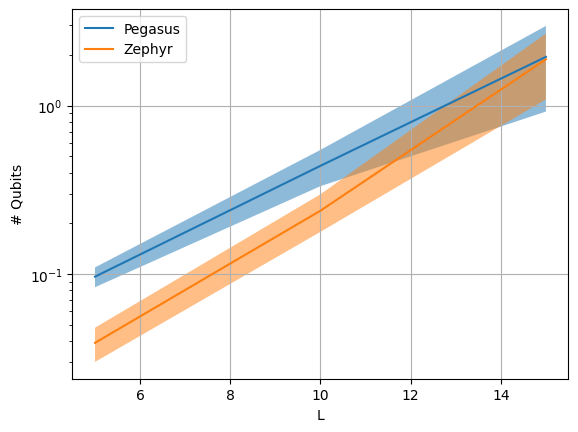

In [53]:
plots("Time")